#**Monthly Rainfall Amount Analysis and Forecasting of the Dhaka Division**

In this project, we are given a dataset depicting rainfall amounts both monthly and daily in Dhaka division from January 1984 to June 2015. The given dataset has 35 columns. The columns indicated by 1 to 31 represent the daily rainfall amounts in different months of the year. The Monthly Rainfall column indicates the total monthly rainfall amount for a particular month, whose value can be found by adding the values of the columns from 1 to 31 across the rows. The column named Station has a fixed value of Dhaka, as the dataset contains the past monthly and daily rainfall amounts of the Dhaka division. The column named Year indicates the years, and that named Month indicates the months, i.e., values ranging from 1 to 12.

We are going to perform a time series analysis on our given dataset. Although our dataset contains data on both monthly and daily rainfall amounts in the past, we are going to proceed with only monthly rainfall amount analysis for the Dhaka division. The daily rainfall amounts can also be analyzed and forecasted. But for this project, we will only analyze and forecast the monthly rainfall amount.

As our project involves the analysis of monthly rainfall amounts, there should be a strong presence of seasonality factors in our dataset. Seasonality in a time series is a regular pattern of changes that repeats over S time periods, where S defines the number of time periods until the pattern repeats again. For example, there is seasonality in monthly data for which high values tend always to occur in some particular months and low values tend always to occur in other particular months.

For this reason, we will perform a statistical time series analysis that considers the seasonal factor present in the time series data. In particular, we are going to fit a statistical model named Seasonal ARIMA on the given dataset. Seasonal ARIMA is a variation of the autoregressive moving average model, or ARIMA in short. In a seasonal ARIMA model, seasonal AR and MA terms are predicted using data values and errors at times Xt with lags that are multiples of S (the span of the seasonality). The seasonal ARIMA model incorporates both non-seasonal and seasonal factors in a multiplicative model. Shorthand notation for SARIMA model is:

ARIMA (p, d, q) * (P, D, Q)S


For our analysis and forecasting project, we use the R statistical software.

At first, we install the require packages and import libraries for our monthly rainfall modeling project.

In [ ]:
install.packages("fpp2")
install.packages("ggplot2")
install.packages("forecast")
install.packages("tseries")
install.packages("caschrono")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘Rcpp’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’, ‘expsmooth’, ‘fma’, ‘forecast’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘checkmate’, ‘htmlwidgets’, ‘gridExtra’, ‘htmlTable’, ‘viridis’, ‘Formula’, ‘Hmisc’




In [ ]:
library(forecast)
library(tseries)
library(fpp2)
library(ggplot2)
library(caschrono)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

── Attaching packages ────────────────────────────────────────────── fpp2 2.5 ──

✔ ggplot2   3.4.4     ✔ expsmooth 2.3  
✔ fma       2.5       



Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




**Data Preprocessing**

For the data preprocessing step, we create a new dataset that only contains the columns named Station, Year, Month, and Monthly Rainfall. That is, the columns indicating daily rainflal amounts are removed from the initial dataset to create the new dataset. After that we read the dataset using the read.csv() function in R and examine the loaded data.



In [ ]:
data <- read.csv("/content/Time Series Mini Project Data.csv")
head(data)

,Station,Year,Month,Monthly.Rainfall
,<chr>,<int>,<int>,<int>
1,Dhaka,1984,1,13
2,Dhaka,1984,2,1
3,Dhaka,1984,3,5
4,Dhaka,1984,4,124
5,Dhaka,1984,5,707
6,Dhaka,1984,6,637


**We gather basic info about our dataset using the summary() function.**

In [ ]:
summary(data)

   Station               Year          Month        Monthly.Rainfall
 Length:378         Min.   :1984   Min.   : 1.000   Min.   :  0.0   
 Class :character   1st Qu.:1991   1st Qu.: 3.000   1st Qu.: 12.0   
 Mode  :character   Median :1999   Median : 6.000   Median :132.5   
                    Mean   :1999   Mean   : 6.452   Mean   :170.6   
                    3rd Qu.:2007   3rd Qu.: 9.000   3rd Qu.:271.2   
                    Max.   :2015   Max.   :12.000   Max.   :839.0   

**Reading the dataset in time series format**


We read the values of the column named Monthly Rainfall in our dataset in time series format.

In [ ]:
rainfall <- ts(data$Monthly.Rainfall, start=c(1984, 1), frequency=12)
head(rainfall,12)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1984,13,1,5,124,707,637,694,311,478,58,0,0


**Time series plot of the monthly rainfall amounts**

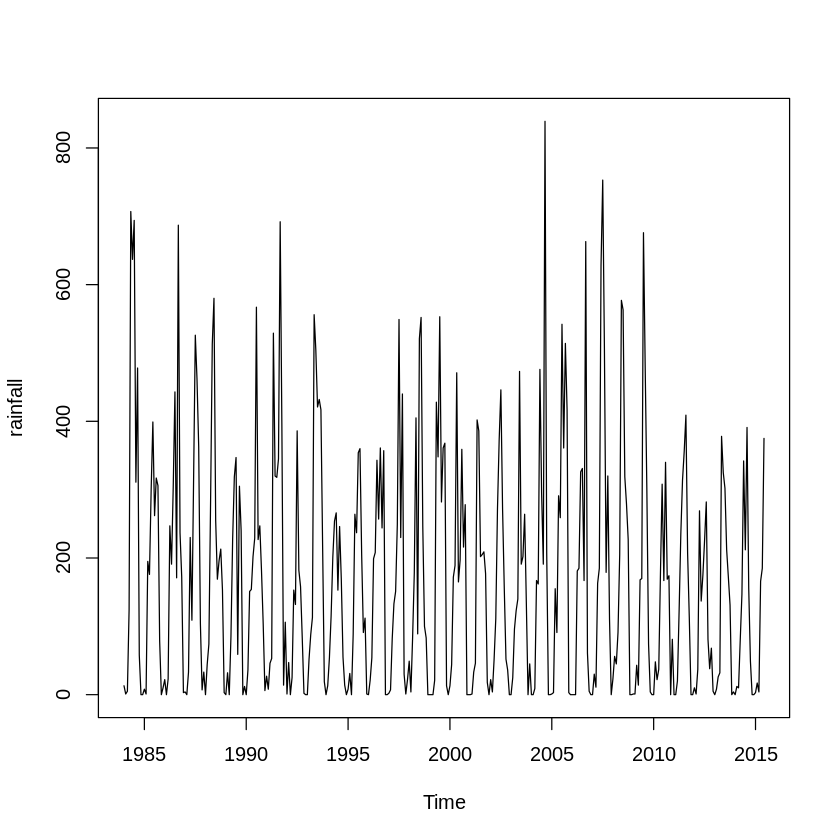

In [ ]:
plot(rainfall)

From the time series plot of the monthly rainfall amounts, we can observe that there is a strong presence of seasonality in the monthly rainfall amounts. Although it can be assumed that there is no trend in the monthly rainfall data, we can be really sure of this fact from the ADF test, which we will perform later. The ADF test is a popular statistical tool for checking the stationarity of time series data. If the data is indeed stationary from the ADF test, we can conclude that it is less likely that trend is present in the monthly rainfall amount data.

**Suggestion from auto.arima command**

We will firstly use auto.arima command, from forecast package, to check quickly if the monthly rainfall data can be fitted using SARIMA models. If the estimated AIC is non-negative and if the log likelihood is negative, we can conclude that SARIMA models can be good for this data.

In [ ]:
m0 <- auto.arima(rainfall)
m0

Series: rainfall 
ARIMA(0,0,1)(2,1,0)[12] 

Coefficients:
         ma1     sar1     sar2
      0.1301  -0.6867  -0.2364
s.e.  0.0494   0.0521   0.0525

sigma^2 = 14564:  log likelihood = -2275.03
AIC=4558.05   AICc=4558.16   BIC=4573.66

We can notice from the result of the auto-arima command that the seasonal models can be a good fit for our data as the AIC value is non-negative and the log-likelihood value is negative. But we won't use the orders found from the results of this command; we will only use the obtained results as suggestions for our future analysis.

**ADF Test of the monthly rainfall data**

In [ ]:
adf.test(rainfall)

Warning message in adf.test(rainfall):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  rainfall
Dickey-Fuller = -11.694, Lag order = 7, p-value = 0.01
alternative hypothesis: stationary


From the result of the ADF test, we find a p-value of less than 0.05, which indicates that we have to reject the null hypothesis of non-stationarity of the data. So, the data is definitely stationary. So, we can conclude that it is less likely that trend is present in the monthly rainfall amount data. Also, we can conclude that there is no significant difference in variances over time in our data.

**Seasonal Differencing**

As the results from the ADF test indicate that the monthly rainfall data is stationary, we won't do any differencing to detrend our data. We will only perform a first-order seasonal difference on our data.

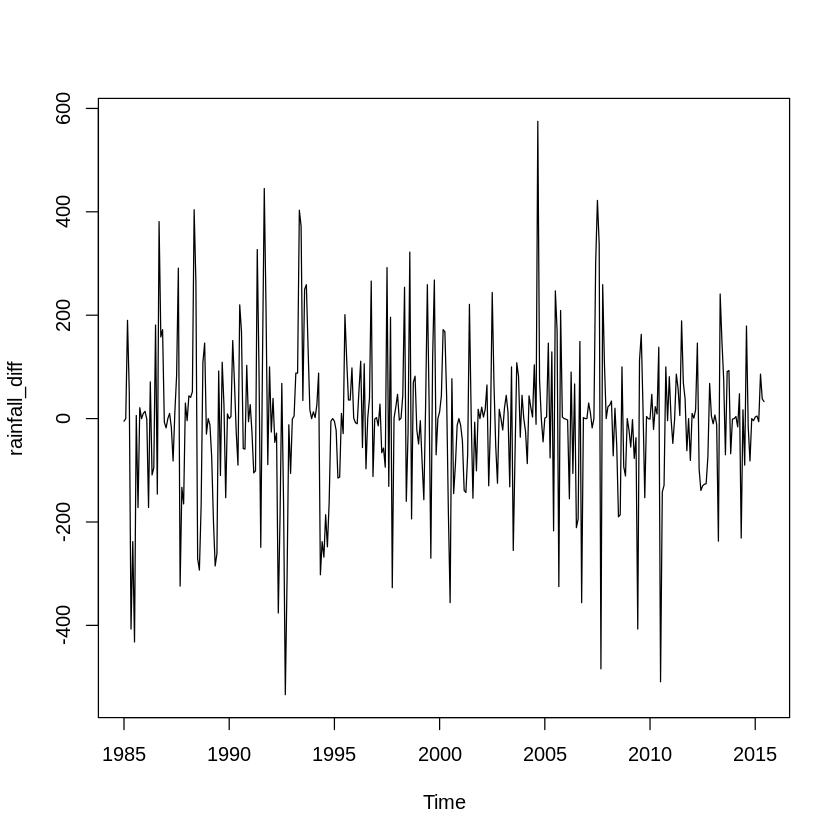

In [ ]:
rainfall_diff <- diff(rainfall, lag=12, differences=1)
plot(rainfall_diff)

As we have not performed regular differencing to detrend the data, we will consider the value of d as 0. We will also consider the value of D as 1, as a seasonal difference of one time period has been performed on the data.

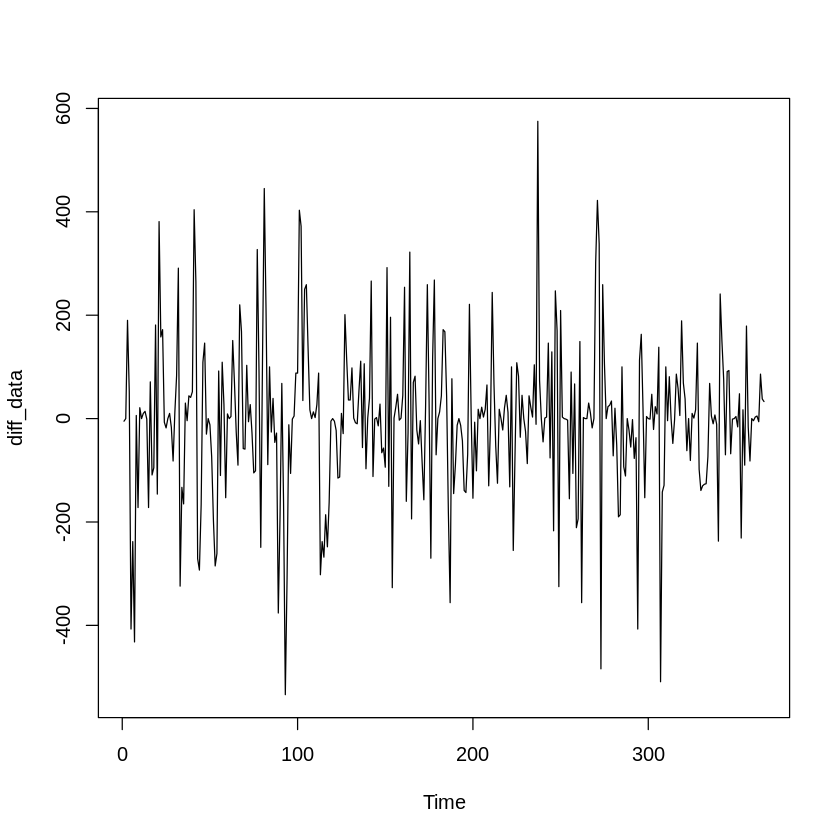

In [ ]:
diff_data <- diff(data$Monthly.Rainfall, lag=12, differences=1)
plot.ts(diff_data)

We perform this seasonal differencing to make educated guesses about the values of seasonal and non-seasonal autoregressive and moving average parameters, i.e., the values of p, P, q, and Q. We take decisions about the moving average (MA) parameters q and Q from the ACF plot. And we take decisions about the autoregressive (AR) parameters p and P from the PACF plot.

**ACF plot of the seasonal difference data**

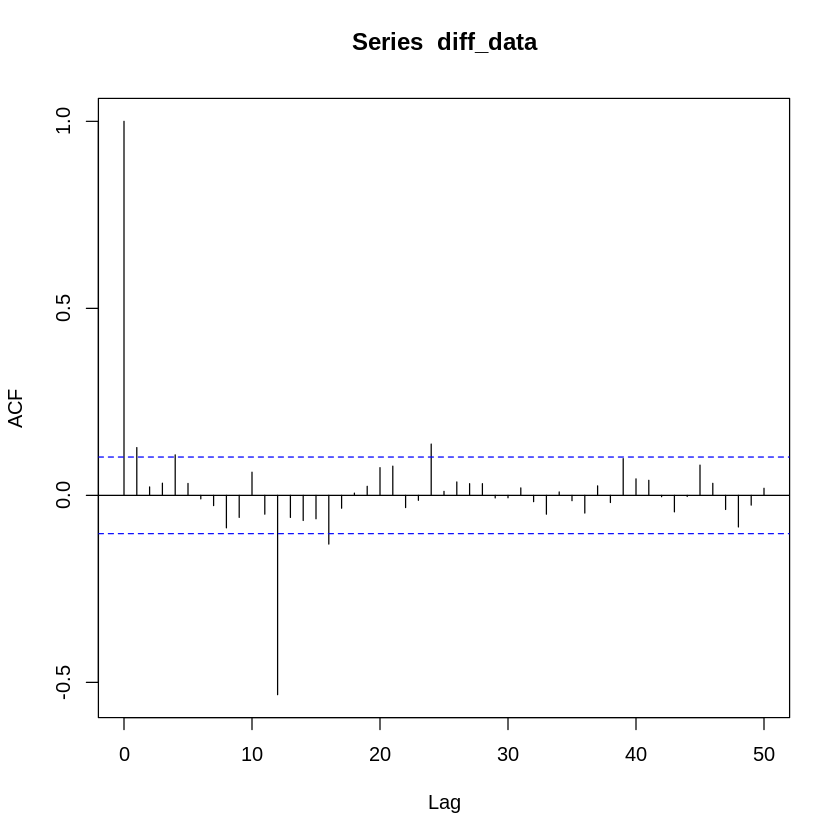

In [ ]:
acf(diff_data, lag.max=50)

We can deduce from the previous graph that the ACF is decreasing to zero after lag 12. We also see the presence of a clear spike in the negative direction at lag 12. Then we will choose the values of q and Q in such a way that q + 12Q ≤ 13. We recall that q+12Q is the degree of the MA operator.

**PACF plot of the seasonal difference data**

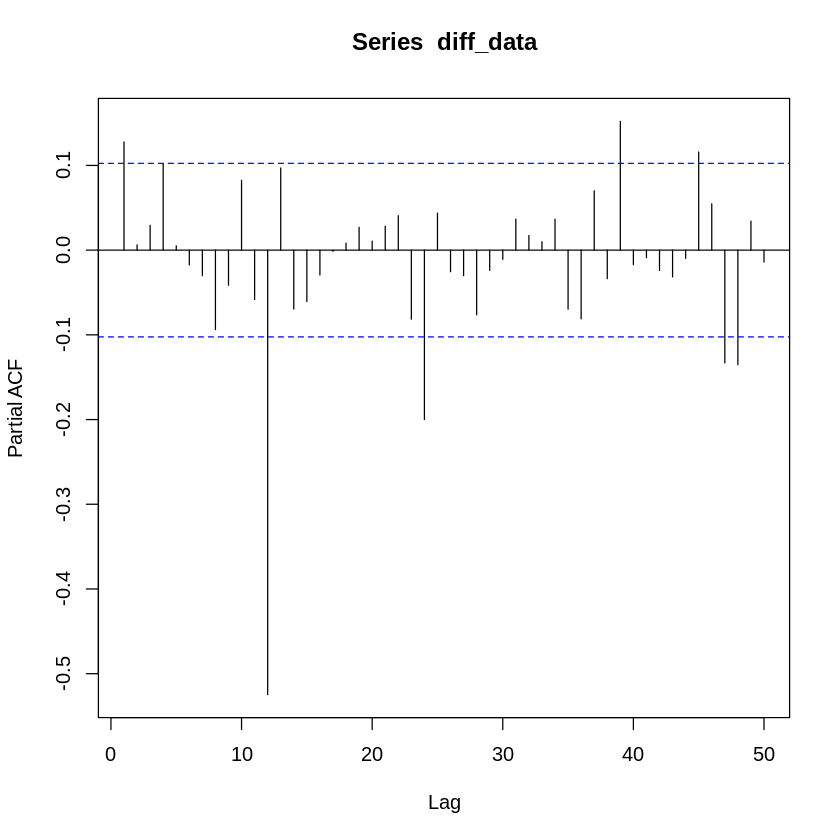

In [ ]:
pacf(diff_data, lag.max=50)

We see clear spikes at lags of multiples of the period 12. We will then have the same conclusion as in the ACF, and we will choose the values of p and P such that p + 12P ≤ 13.

**Selection of the best possible order values**

We shall now initiate the selection process. Before proceeding, we shall generate a matrix containing possible values of p, d, q, P, D, Q, and T. An individual instance of order value is represented by a row. Once the possible order value matrix has been constructed, SARIMA models will be fitted using each order value from the matrix. Following that, the models exhibiting negative AIC values and those producing residuals other than white noise will be eliminated.

**Construction of the matrix of the parameters p, d, q, P, D, Q and T**

In [ ]:
qQ=list()
for(i in 1:14) qQ[[i]]=c(i-1,0)
qQ[[15]]=c(0,1)
qQ[[16]]=c(1,1)
pP=qQ

dt_params=c()
for(i in 1:16){
   for(j in 1:16){
     temp=c(pP[[i]][1],1,qQ[[j]][1],pP[[i]][2],1,
            qQ[[j]][2],12)
     dt_params=rbind(temp,dt_params)
  }
}

colnames(dt_params)=c("p","d","q","P","D","Q","T")
print(nrow(dt_params))
rownames(dt_params)=1:256

[1] 256


**Estimating the SARIMA models**

In [ ]:
models=vector("list",256)
for(i in 1:256){
     try(models[[i]]<-Arima(data$Monthly.Rainfall,order = dt_params[i,1:3],
                   seasonal = list(order=dt_params[i,4:6],period=12),
                                       lambda = NULL))
}

Error in optim(init[mask], armafn, method = optim.method, hessian = TRUE,  : 
  non-finite finite-difference value [15]


**Checking whether the models have produced white noise residuals**

For checking whether the models estimated have produced white noise residuals, we will now perform a Portemanteau test with lags from 1 to 10. If the significance level is set at 5% and at least one p-value from the test is less than that threshold, the model is rejected.

In [ ]:
library(caschrono)
aa=rep(NA,256)
for(i in 1:256){
  if(length(models[[i]]$residuals)>1){
     a=Box.test.2(x = models[[i]]$residuals,nlag = 10,type = "Box-Pierce")
     z=prod(1-(a[,2]<.05))
     if(z==1) aa[i]="y"
     else aa[i]="n"
   }
}

**Creation of a data table with all the results**

In [ ]:
dt_params2=data.frame(dt_params)
dt_params2$residuals=aa

aic=rep(NA,256)
model_names=rep(NA,256)
for(i in 1:256){
   if(length(models[[i]]$aic)>0){
     aic[i]=models[[i]]$aic
     model_names[i]=as.character(models[[i]])
   }
}

dt_params2$aic=aic
dt_params2$model=model_names

In [ ]:
install.packages("DT")
library(DT)
dt_params2$aic=round(dt_params2$aic,4)
dt_params2=na.omit(dt_params2)
datatable(dt_params2, rownames = F)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘later’, ‘lazyeval’, ‘httpuv’, ‘crosstalk’, ‘promises’




HTML widgets cannot be represented in plain text (need html)

We found 4558.16 as the AIC value from the results of the auto.arima command. We now check whether there are any other models with different order values than what was suggested from the auto.arima command that will give us lower AIC values.

In [ ]:
i=as.numeric(rownames(dt_params2)[which(dt_params2$aic<4558.16)])
res=sapply(i, function(x)as.character(models[[x]]))
res

[1] "ARIMA(1,1,1)(1,1,1)[12]"   "ARIMA(0,1,1)(1,1,1)[12]"  
 [3] "ARIMA(0,1,13)(1,1,0)[12]"  "ARIMA(13,1,1)(0,1,1)[12]" 
 [5] "ARIMA(13,1,0)(0,1,1)[12]"  "ARIMA(13,1,13)(0,1,0)[12]"
 [7] "ARIMA(13,1,12)(0,1,0)[12]" "ARIMA(12,1,1)(0,1,1)[12]" 
 [9] "ARIMA(12,1,0)(0,1,1)[12]"  "ARIMA(12,1,13)(0,1,0)[12]"
[11] "ARIMA(12,1,12)(0,1,0)[12]" "ARIMA(11,1,1)(0,1,1)[12]" 
[13] "ARIMA(11,1,0)(0,1,1)[12]"  "ARIMA(11,1,13)(0,1,0)[12]"
[15] "ARIMA(11,1,12)(0,1,0)[12]" "ARIMA(10,1,1)(0,1,1)[12]" 
[17] "ARIMA(10,1,0)(0,1,1)[12]"  "ARIMA(10,1,13)(0,1,0)[12]"
[19] "ARIMA(10,1,12)(0,1,0)[12]" "ARIMA(9,1,1)(0,1,1)[12]"  
[21] "ARIMA(9,1,0)(0,1,1)[12]"   "ARIMA(9,1,13)(0,1,0)[12]" 
[23] "ARIMA(9,1,12)(0,1,0)[12]"  "ARIMA(8,1,1)(0,1,1)[12]"  
[25] "ARIMA(8,1,0)(0,1,1)[12]"   "ARIMA(8,1,13)(0,1,0)[12]" 
[27] "ARIMA(8,1,12)(0,1,0)[12]"  "ARIMA(7,1,1)(0,1,1)[12]"  
[29] "ARIMA(7,1,0)(0,1,1)[12]"   "ARIMA(7,1,13)(0,1,0)[12]" 
[31] "ARIMA(7,1,12)(0,1,0)[12]"  "ARIMA(6,1,1)(0,1,1)[12]"  
[33] "ARIMA(6,1,0)(0,1,1)[12]"   "ARIMA(6,1,13)(0,1,0)[12]" 
[35] "ARIMA(6,1,12)(0,1,0)[12]"  "ARIMA(5,1,1)(0,1,1)[12]"  
[37] "ARIMA(5,1,0)(0,1,1)[12]"   "ARIMA(5,1,13)(0,1,0)[12]" 
[39] "ARIMA(4,1,1)(0,1,1)[12]"   "ARIMA(4,1,13)(0,1,0)[12]" 
[41] "ARIMA(3,1,1)(0,1,1)[12]"   "ARIMA(3,1,13)(0,1,0)[12]" 
[43] "ARIMA(2,1,1)(0,1,1)[12]"   "ARIMA(2,1,13)(0,1,0)[12]" 
[45] "ARIMA(1,1,1)(0,1,1)[12]"   "ARIMA(1,1,13)(0,1,0)[12]" 
[47] "ARIMA(0,1,1)(0,1,1)[12]"   "ARIMA(0,1,13)(0,1,0)[12]"

We can observe that there are, in fact, many models with a lower AIC value than that suggested by the auto.arima command. So, accepting the suggested order values from the auto.arima command as the default order values for the estimation of the SARIMA model is often not a good choice.

**Sorting the AIC values produced to find the SARIMA model with lowest possible AIC value**

In [ ]:
aic_values <- dt_params2$aic
sorted_aic_values <- sort(aic_values)
sorted_aic_values

[1] 4507.376 4509.120 4509.328 4509.702 4511.104 4511.697 4512.968 4514.967
  [9] 4516.762 4518.761 4519.883 4520.186 4520.575 4521.120 4521.704 4521.882
 [17] 4522.557 4523.009 4524.133 4525.005 4525.812 4525.915 4527.998 4528.581
 [25] 4530.327 4531.637 4533.063 4533.477 4534.996 4535.055 4535.473 4535.673
 [33] 4536.014 4536.829 4537.484 4537.953 4546.360 4548.345 4548.360 4549.051
 [41] 4549.525 4549.748 4550.318 4550.417 4555.172 4555.918 4556.203 4557.756
 [49] 4559.205 4559.711 4560.180 4566.403 4566.460 4566.816 4568.707 4569.359
 [57] 4571.778 4572.179 4573.548 4573.749 4574.238 4574.989 4575.015 4576.634
 [65] 4576.844 4577.553 4577.750 4578.462 4578.559 4579.247 4579.423 4580.069
 [73] 4580.264 4581.742 4581.915 4581.990 4582.098 4582.847 4583.827 4583.890
 [81] 4583.912 4584.020 4584.339 4584.561 4584.923 4585.459 4585.715 4585.810
 [89] 4585.824 4586.037 4586.228 4586.484 4586.596 4586.616 4587.232 4587.277
 [97] 4587.405 4587.521 4588.038 4588.203 4588.363 4588.522 4588.677 4589.211
[105] 4589.516 4590.195 4590.198 4591.230 4591.961 4592.199 4592.216 4594.198
[113] 4599.576 4600.228 4601.584 4604.560 4605.896 4605.913 4606.557 4607.059
[121] 4608.082 4608.168 4611.924 4613.342 4613.659 4614.520 4615.216 4615.334
[129] 4615.870 4617.821 4617.824 4619.905 4620.608 4620.910 4621.894 4622.835
[137] 4625.257 4627.866 4631.314 4631.361 4632.063 4633.182 4633.361 4633.383
[145] 4633.481 4634.039 4635.176 4636.900 4638.605 4638.651 4639.637 4640.099
[153] 4640.312 4640.504 4642.310 4642.332 4643.780 4644.213 4648.165 4648.682
[161] 4648.777 4649.015 4650.277 4650.434 4651.698 4652.117 4652.383 4653.226
[169] 4654.310 4655.026 4657.171 4659.166 4659.742 4660.884 4660.981 4661.237
[177] 4661.948 4666.338 4666.485 4667.424 4668.452 4669.841 4670.340 4670.742
[185] 4671.367 4672.071 4673.422 4673.813 4674.645 4675.076 4675.158 4676.469
[193] 4676.775 4676.797 4677.192 4678.370 4678.538 4678.590 4683.359 4683.469
[201] 4687.500 4687.570 4687.688 4688.747 4689.161 4689.203 4689.632 4689.861
[209] 4689.895 4691.717 4692.335 4692.409 4692.677 4692.861 4695.252 4698.205
[217] 4698.387 4699.517 4699.779 4699.868 4699.975 4700.176 4700.236 4701.135
[225] 4701.397 4701.758 4701.800 4701.960 4702.101 4702.214 4702.468 4702.474
[233] 4703.762 4703.873 4704.069 4705.351 4705.648 4706.738 4706.936 4710.903
[241] 4724.756 4730.135 4731.621 4732.033 4732.640 4740.206 4741.365 4741.456
[249] 4741.920 4744.271 4751.206 4765.000 4783.611 4821.439 4897.654

In [ ]:
dt_params2[dt_params2$aic == 4507.3761, ]

,p,d,q,P,D,Q,T,residuals,aic,model
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
225,1,1,1,0,1,1,12,y,4507.376,"ARIMA(1,1,1)(0,1,1)[12]"


We find that the SARIMA model with the order value (p, d, q, P, D, Q, T) of (1, 1, 1, 0, 1, 1, 12) has the lowest possible AIC value. So, we fit this SARIMA model.

In [ ]:
fitmodel_min<-arima(data$Monthly.Rainfall, order = c(1,1,1),seasonal = list(order = c(0,1,1), period = 12))
summary(fitmodel_min)


Call:
arima(x = data$Monthly.Rainfall, order = c(1, 1, 1), seasonal = list(order = c(0, 
    1, 1), period = 12))

Coefficients:
         ar1      ma1     sma1
      0.1141  -0.9781  -0.9567
s.e.  0.0547   0.0195   0.0570

sigma^2 estimated as 12029:  log likelihood = -2249.69,  aic = 4507.38

Training set error measures:
                   ME     RMSE      MAE MPE MAPE      MASE         ACF1
Training set 4.869881 107.7723 75.84416 NaN  Inf 0.6988964 -0.005838608

We also fit another SARIMA model considering the value of d as 0, as our data is stationary and has no trend.

In [ ]:
fitmodel2<-arima(data$Monthly.Rainfall, order = c(1,0,1),seasonal = list(order = c(0,1,1), period = 12))
summary(fitmodel)


Call:
arima(x = data$Monthly.Rainfall, order = c(1, 0, 1), seasonal = list(order = c(0, 
    1, 1), period = 12))

Coefficients:
         ar1      ma1     sma1
      0.5442  -0.4183  -0.9357
s.e.  0.3193   0.3467   0.0437

sigma^2 estimated as 12108:  log likelihood = -2252.25,  aic = 4512.5

Training set error measures:
                    ME    RMSE      MAE MPE MAPE      MASE         ACF1
Training set -11.98735 108.275 75.96873 NaN  Inf 0.7000443 -0.007774242

We find that the AIC values from the two models are not much different.

**Finding the residuals of the best model fitted and ACF plot of the residuals**

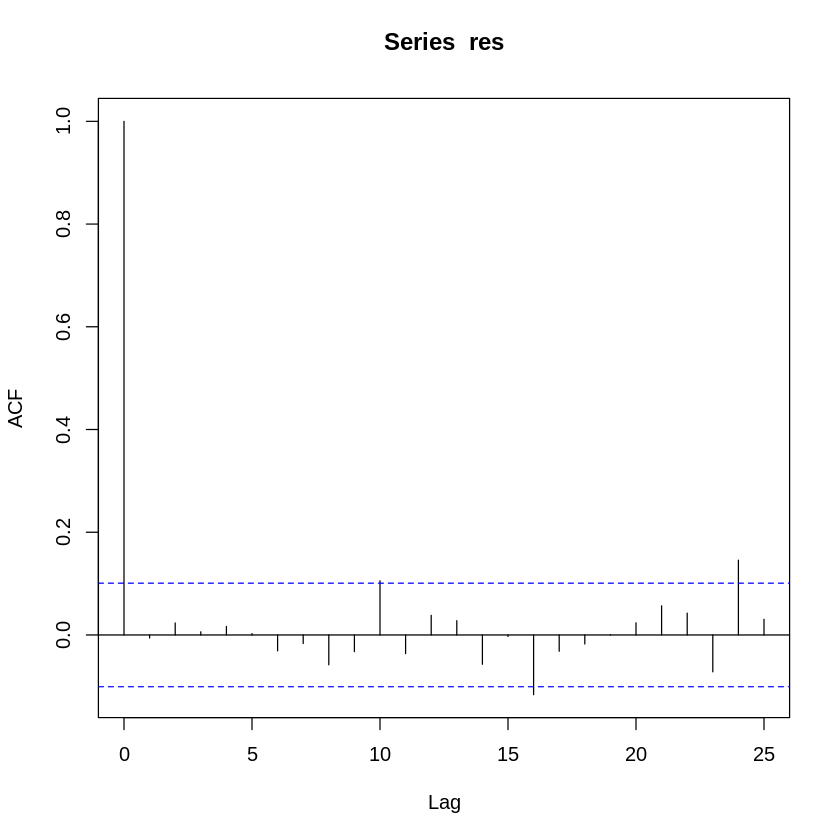

In [ ]:
res<-fitmodel_min$residuals
acf(res)

We find that the residuals don't have very significant autocorrelations at any of the lags. So, we can say that our fitted model has produced white noise residuals.

**ADF Test of the residuals**

We also perform an ADF test of the residuals to check whether the model has produced white noise residuals or not.

In [ ]:
adf.test(res)

Warning message in adf.test(res):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  res
Dickey-Fuller = -7.3913, Lag order = 7, p-value = 0.01
alternative hypothesis: stationary


From the result of the ADF test, we find a p-value of less than 0.05, which indicates that we have to reject the null hypothesis of non-stationarity of the residuals. So, the residuals are definitely stationary. Therefore, we can also confirm the fact the model has produced white noise residuals.

**Box-Pierce and Ljung-Box test of the residuals**

We also perform Box-Pierce and Ljung-Box tests of the residuals to further confirm that the model is producing white noise residuals.

In [ ]:
Box.test(res,type="Ljung-Box", lag=length(res)-1)


	Box-Ljung test

data:  res
X-squared = 333.45, df = 377, p-value = 0.9481


In [ ]:
Box.test(res,type="Box-Pierce", lag=length(res)-1)


	Box-Pierce test

data:  res
X-squared = 182.54, df = 377, p-value = 1


We observe that for lag 377 (length of residuals minus one), the p-values from both of the tests are largely greater than 0.05. So, we can further confirm that there are no significant autocorrelations at any of the lags for the residuals. Therefore, the model has produced white noise residuals.

As the model has produced white noise residuals, which are confirmed by various statistical tests, we can conclude that the SARIMA model with the order of (1, 1, 1, 0, 1, 1, 12) is the best-fit model for our given monthly rainfall data.

**Forecasting with the fitted SARIMA model**

We use our fitted SARIMA model to generate forecasts for the monthly rainfall amounts for the next 24 months.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘astsa’


The following objects are masked from ‘package:fma’:

    chicken, sales


The following object is masked from ‘package:fpp2’:

    oil


The following object is masked from ‘package:forecast’:

    gas




$pred
Time Series:
Start = 379 
End = 402 
Frequency = 1 
 [1] 357.435204 275.022949 272.729973 130.311560  -7.464270 -24.527289
 [7] -29.280289 -17.913236  12.918053  91.672913 230.301368 305.588661
[13] 347.334312 271.688190 270.167094 127.836737  -9.929048 -26.990921
[19] -31.743790 -20.376723  10.454569  89.209429 227.837884 303.125177

$se
Time Series:
Start = 379 
End = 402 
Frequency = 1 
 [1] 110.0218 111.0401 111.1170 111.1544 111.1882 111.2226 111.2420 111.2751
 [9] 111.3083 111.3414 111.3745 111.4076 111.7043 111.7579 111.7960 111.8325
[17] 111.8690 111.9066 111.9312 111.9674 112.0036 112.0398 112.0759 112.1120

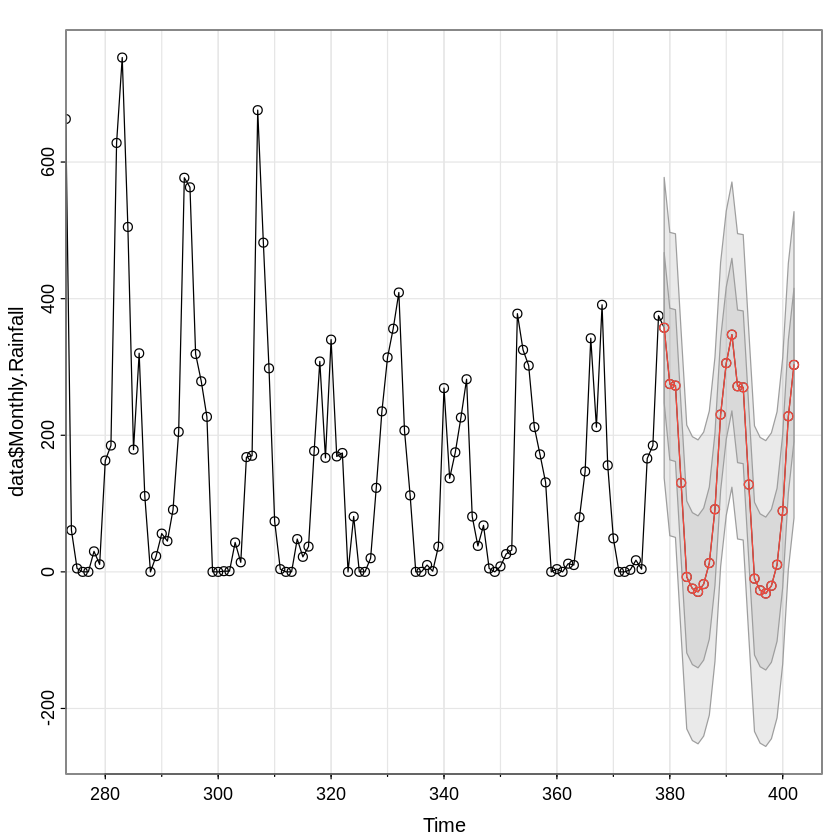

In [ ]:
install.packages("astsa")
library(astsa)
sarima.for(data$Monthly.Rainfall, 24, 1,1,1,0,1,1,12)

From the above plot, we can observe that our fitted model can more or less accurately capture the pattern of seasonality in future forecasting. So, we can conclude that our fitted SARIMA model has analyzed the monthly raifall daa of Dhaka division satisfactorily.